In [1]:
import pandas as pd
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt('./LeastSquares.csv', delimiter=',')
data.shape

(200, 3)

In [3]:
data[0]

array([2.35191552, 0.56126998, 2.23737782])

In [4]:
H = np.hstack([np.cos(data[:, 2]).reshape(-1, 1), np.sin(data[:, 2]).reshape(-1, 1)])
H.shape

(200, 2)

In [5]:
b = data[:, 1]

In [6]:
xa = (np.linalg.inv(H.T @ H) @ H.T @ b).reshape(-1, 1)
xa

array([[ 9.7203981 ],
       [10.04178329]])

In [7]:
x0 = xa
x0

array([[ 9.7203981 ],
       [10.04178329]])

In [8]:
Q0 = np.eye(2) * 1000000
Q0

array([[1000000.,       0.],
       [      0., 1000000.]])

In [9]:
R = np.eye(1)
R

array([[1.]])

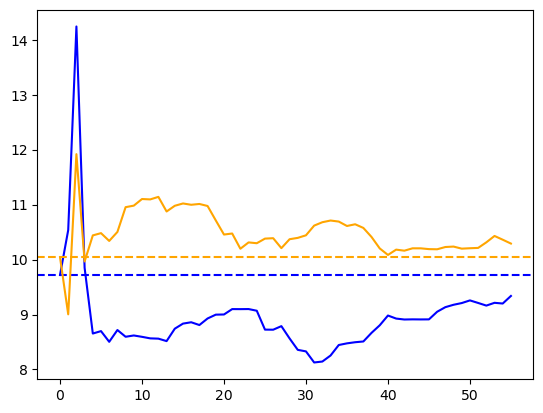

(56, 2)

In [10]:
x = deepcopy(x0)
Q = deepcopy(Q0)

xarr = [x]

for i, d in enumerate(data):
    H_d = H[i].reshape(1, 2)
    phi, l, phi_noised = d
    x = x + Q @ H_d.T @ np.linalg.inv(H_d @ Q @ H_d.T + R) @ (l - H_d @ x)
    Q = Q - Q @ H_d.T @ np.linalg.inv(H_d @ Q @ H_d.T + R) @ H_d @ Q
    xarr.append(x)
    
    s1 = np.sqrt(Q[0, 0])
    s2 = np.sqrt(Q[1, 1])
    
    if s1 < 0.2 and s2 < 0.2:
        break
    
xarr = np.array(xarr).squeeze()

plt.plot(xarr[:, 0], color='b')
plt.axhline(xa[0, 0], color='b', linestyle='--')

plt.plot(xarr[:, 1], color='orange')
plt.axhline(xa[1, 0], color='orange', linestyle='--')

plt.show()

xarr.shape

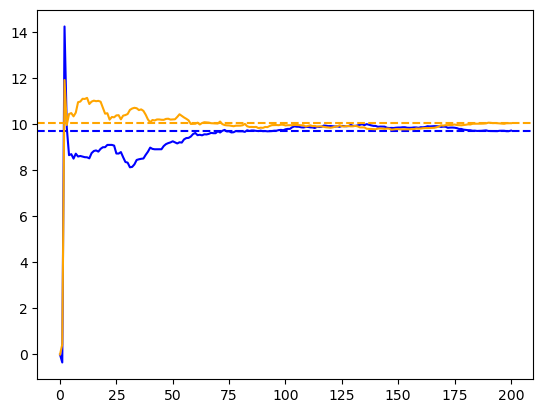

(201, 2)

In [11]:
x02 = np.zeros((2, 1))

x = deepcopy(x02)
Q = deepcopy(Q0)

xarr2 = [x]

for i, d in enumerate(data):
    H_d = H[i].reshape(1, 2)
    phi, l, phi_noised = d
    x = x + Q @ H_d.T @ np.linalg.inv(H_d @ Q @ H_d.T + R) @ (l - H_d @ x)
    Q = Q - Q @ H_d.T @ np.linalg.inv(H_d @ Q @ H_d.T + R) @ H_d @ Q
    xarr2.append(x)
    
    s1 = np.sqrt(Q[0, 0])
    s2 = np.sqrt(Q[1, 1])
    
    # if s1 < 0.2 and s2 < 0.2:
    #     break
    
xarr2 = np.array(xarr2).squeeze()

plt.plot(xarr2[:, 0], color='b')
plt.axhline(xa[0, 0], color='b', linestyle='--')

plt.plot(xarr2[:, 1], color='orange')
plt.axhline(xa[1, 0], color='orange', linestyle='--')

plt.show()

xarr2.shape

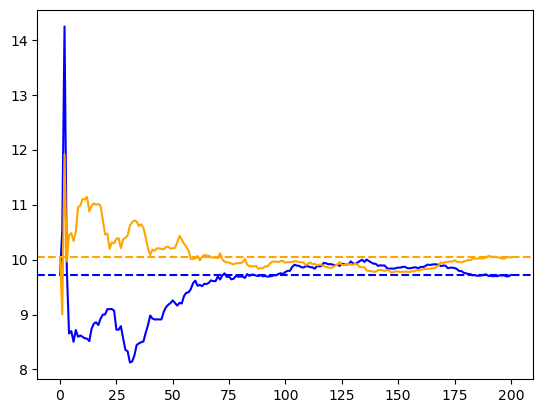

(201, 2)

In [12]:
x = deepcopy(x0)
Q = deepcopy(Q0)

xarr = [x]

for i, d in enumerate(data):
    H_d = H[i].reshape(1, 2)
    phi, l, phi_noised = d
    x = x + Q @ H_d.T @ np.linalg.inv(H_d @ Q @ H_d.T + R) @ (l - H_d @ x)
    Q = Q - Q @ H_d.T @ np.linalg.inv(H_d @ Q @ H_d.T + R) @ H_d @ Q
    xarr.append(x)
    
xarr = np.array(xarr).squeeze()

plt.plot(xarr[:, 0], color='b')
plt.axhline(xa[0, 0], color='b', linestyle='--')

plt.plot(xarr[:, 1], color='orange')
plt.axhline(xa[1, 0], color='orange', linestyle='--')

plt.show()

xarr.shape